In [2]:
#Importamos las librerias 
import spacy
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

#Importamos el dataset con pandas
dframe = pd.read_csv("PROMISE_DATASET.csv")
dframe.head()

,Project.ID,Requirement.description,NFR
0,1,'The system shall refresh the display every 60...,PE
1,1,'The application shall match the color of the ...,LF
2,1,' If projected the data must be readable. On...,US
3,1,' The product shall be available during normal...,A
4,1,' If projected the data must be understandabl...,US


In [3]:
dframe.shape

(625, 3)

In [4]:
dframe.NFR.value_counts()

F     255
US     67
SE     66
O      62
PE     54
LF     38
A      21
SC     21
MN     17
L      13
FT     10
PO      1
Name: NFR, dtype: int64

In [5]:
#Importamos un modelo de ingles del spacy

import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
#nlp = en_core_web_sm.load()
nlp = spacy.load('en')

# To build a list of stop words for filtering
stopwords = list(STOP_WORDS)
#print(stopwords)

In [6]:
import string
import spacy
punctuations = string.punctuation
# Creating a Spacy Parser
from spacy.lang.en import English
parser = English()

In [7]:
def my_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

In [8]:
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [9]:
#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [10]:
# Vectorization
vectorizer = CountVectorizer(tokenizer = my_tokenizer, ngram_range=(1,1)) 
classifier = LinearSVC()

In [11]:
# Splitting Data Set
from sklearn.model_selection import train_test_split

In [12]:
# Features and Labels
X = dframe['Requirement.description']
ylabels = dframe['NFR']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=53)

In [13]:
from sklearn import metrics
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
pipe_countvect = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])
# Fit our data
pipe_countvect.fit(X_train,y_train)
# Predicting with a test dataset
sample_prediction = pipe_countvect.predict(X_test)

# Prediction Results
#Imprimimos los resultados de las predicciones
for (sample,pred) in zip(X_test,sample_prediction):
    print(sample,"Prediction=>",pred)
    

#print("Accuracy: ",pipe_countvect.score(X_test,y_test))
#print("Accuracy: ",pipe_countvect.score(X_test,sample_prediction))
# Accuracy
#print("Accuracy: ",pipe_countvect.score(X_train,y_train))

'The system shall display Events or Activities.' Prediction=> F
'Each page shall contain a navigation menu which shows the index into which the current page is contained.' Prediction=> LF
' When the hit results in sinking a ship  the product shall indicate the type of ship sunk on the defensive grid of the defensive player.' Prediction=> F
'The realtor shall be able to retrieve a map showing property locations for a specified area' Prediction=> F
'The System shall maintain consistent security.  Any changes in user passwords and/or permissions should take affect in all parts of the System.' Prediction=> F
' For each shot  the product shall mark the shot as a hit or miss on the defensive grid of the defensive player.' Prediction=> F
'System shall let administrator de-activate a customer account in under 1 minute. Customer will no longer be able to access the website.' Prediction=> SE
'System shall let customers register on the website as a ï¿½pay as you goï¿½ user in under 5 minutes.' Pr

'The product shall be used in office environments.' Prediction=> O
'A list of all disputes cases that meet the entered search criteria must be provided to the user.  The list of cases must differentiate the type and/or status of the case by color -coding the line item in the list.  For example all open cases will be yellow and all closed cases will be gray.' Prediction=> F
'For leads that process longer than 25 seconds the system will record the event and duration' Prediction=> PE
'The product shall prevent the player from overlapping ships on their grid.' Prediction=> F
' For each turn  the product shall allow the offensive player to define a shot.' Prediction=> F
' The product shall be available 24 hours per day  seven days per week.' Prediction=> A
'Only managers are able to perform search queries for reservations by user.  100% of all search queries for reservations by user shall be from logons of only management logons.' Prediction=> US
'Website shall allow customers to view revie

' The system shall be able to display a printable summary for individual cohorts  which will include the students enlisted  the Program of study  sequence of classes  cohort progress through the program  and timeline of completion.' Prediction=> F
' The server will support a maximum of 1 000 simultaneous users.' Prediction=> SC
'The system will display a blank set of ratings if there are not ratings yet defined.' Prediction=> F
' 	The RFS system should be available 24/7  especially during the budgeting period. The RFS system shall be available 90% of the time all year  and 98% during the budgeting period. 2% of the time  the system will become available within 1 hour of the time that the situation is reported.' Prediction=> A
'The product will be able to delete conference rooms.' Prediction=> F
'The system shall filter data by: Venues and Key Events.' Prediction=> F
'Only users with Update access must be able to initiate dispute requests.' Prediction=> SE
'The system shall use symbols 

In [14]:
# Accuracy
print('Accuracy',metrics.accuracy_score(y_test,sample_prediction))
#Precision
print('Precision',metrics.precision_score(y_test,sample_prediction, average='macro'))
#Precision
print('Recall',metrics.recall_score(y_test,sample_prediction, average='macro'))

Accuracy 0.768
Precision 0.7575451484542394
Recall 0.6826608174434261


In [25]:
# Oración para prueba
pipe_countvect.predict(["The system should start in 10 seconds","She must log in before typing something"])

array(['PE', 'F'], dtype=object)

In [16]:
#Intentaremos Obtener una matriz de confusion y algunas graficas

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

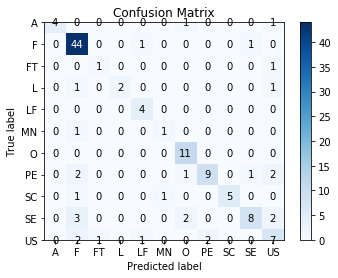

In [24]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, sample_prediction, normalize=False)
plt.show()

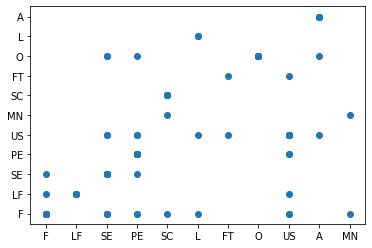

In [19]:
plt.scatter(y_test, sample_prediction)
plt.show()